# Распределения

Ваше имя и фамилия

Крутов Андрей

Произведи импорт всех нужных библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Лимит распределений

1. Визуализируйте биномиальное распределение с **p=0.1** для n = 10, 30, 100 и 300 экспериментов.

In [ ]:
p = 0.1

In [ ]:
n = 10
values = list(range(n + 1))
dist = [stats.binom.pmf(v, n, p) for v in values]

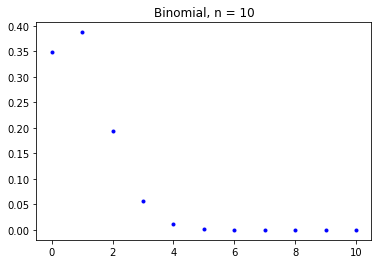

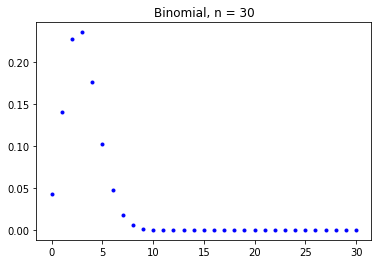

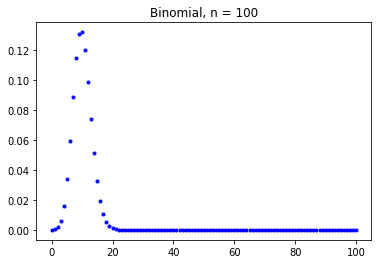

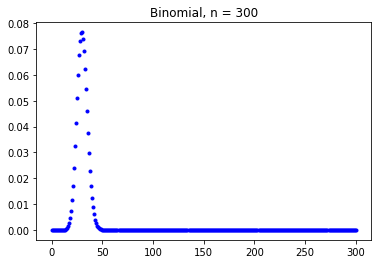

In [ ]:
n = [10, 30, 100, 300]
for i in n:
    values = list(range(i + 1))
    dist = [stats.binom.pmf(v, i, p) for v in values]
    fig, ax = plt.subplots(1, 1)
    _ = ax.plot(dist, 'bo', ms=3, label='binom pmf')
    plt.title('Binomial, n = {}'.format(i))

2. На что похож последний график?

На нормальное распределение с очень длинным хвостом

Для больших, n когда np & n(1-p) > 10, распределение стремится к нормальному распределению.

3. Визуализируйте  распределение Пуассона для Ламбда = 2, 5, 15 и 50.

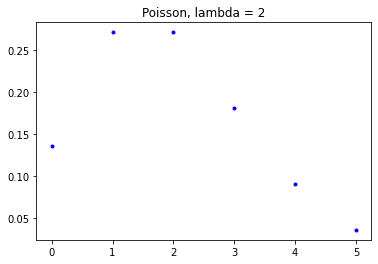

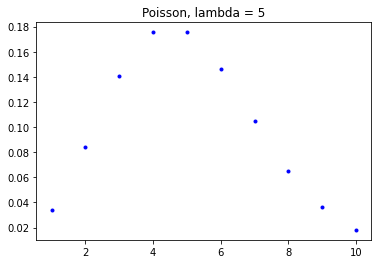

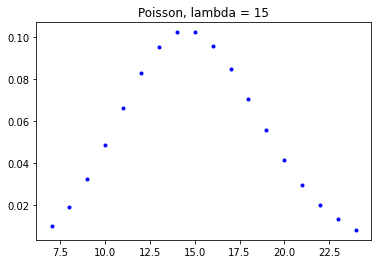

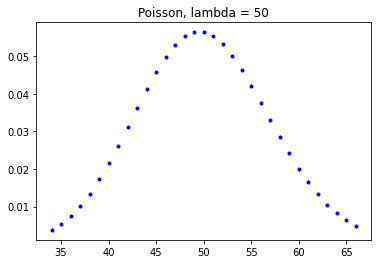

In [ ]:
lambda_ = [2, 5, 15, 50]
for l in lambda_:
    fig, ax = plt.subplots(1, 1)
    x = np.arange(stats.poisson.ppf(0.01, l), stats.poisson.ppf(0.99, l))
    
    ax.plot(x, stats.poisson.pmf(x, l), 'bo', ms=3)
    plt.title('Poisson, lambda = {}'.format(l))

4. Что можно решить, смотря на эти распределения?

С ростом параметра распределение стремится к нормальному

## Стандартное распределение 

### Столы и стулья

Ваша фирма получила заказ на столы и стулья для старшей школы. Любое производство подвержено неточностям. Вы решили моделировать высоту стульев, как случайную величину со стандартным распределением, с ожиданием 83 см и среднеквадратическим отклонением 5 см. 

1. Какая вероятность, что высота произведенного стула не меньше 82 см?

In [ ]:
1 - stats.norm.cdf(82,83,5)

0.579259709439103

2. Какая минимальная высота стульев, которые составляют 20% самых высоких стульев?

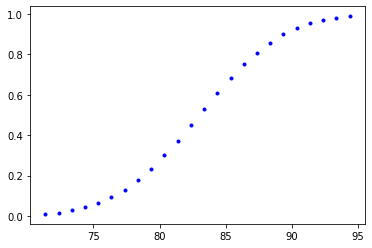

In [ ]:
x = np.arange(stats.norm.ppf(0.01,83, 5),stats.norm.ppf(0.99,83, 5))
fig, ax = plt.subplots(1, 1)
_ = ax.plot(x, stats.norm.cdf(x, 83, 5), 'bo', ms=3)

In [ ]:
stats.norm.ppf(0.8, 83, 5)

87.20810616786457

Минимальная высота 20% самых высоких равна 87.2см

3. Какая нижняя и высшая граница 95% центрального интервала? Что это означает?

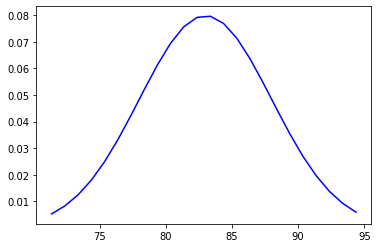

In [ ]:
x = np.arange(stats.norm.ppf(0.01,83, 5),stats.norm.ppf(0.99,83, 5))
fig, ax = plt.subplots(1, 1)
_ = ax.plot(x, stats.norm.pdf(x, 83, 5), 'b-', ms=2, label='gauss pdf')

In [ ]:
(1 - stats.norm.cdf(92.8,83,5))*100

2.4997895148220484

In [ ]:
stats.norm.ppf(0.975, 83, 5)

92.79981992270027

Максимальная высота 92.8 см

In [ ]:
(1 - stats.norm.cdf(73.2,83,5))*100 # результат должен быть 97.5%, так как слева должно остаться 2.5%

97.50021048517794

In [ ]:
stats.norm.ppf(0.025, 83, 5)

73.20018007729973

Минимальная высота 73.2 см

95% интервал означает, что 95% всех значений высоты лежат в пределах этого интервала, т.е. 2.5% самых низких и 2.5% самых высоких лежат за его пределами. С точки зрения стандартного отклонения - 95% интервал соответствует $\pm 2\sigma$

## Распределение Пуассона

Завод считает количество поломок станка в месяц с помощью распределения Пуассона с параметером Ламбда=2

$P = \frac{\lambda ^k}{k!}\cdot e^{-\lambda}$

1. С какой вероятностью станок не будет иметь ни одной поломки в месяц?

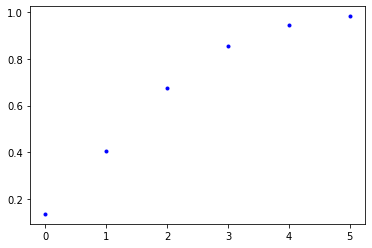

In [ ]:
x = np.arange(stats.poisson.ppf(0.01, 2),stats.poisson.ppf(0.99, 2))
fig, ax = plt.subplots(1, 1)
_ = ax.plot(x, stats.poisson.cdf(x, 2), 'bo', ms=3)

In [ ]:
stats.poisson.cdf(0,2)

0.1353352832366127

Вероятность не получить ни одной поломки равна 13.5%

2. С какой вероятностью станок будет иметь больше 2 поломок в месяц?

In [ ]:
stats.poisson.cdf(2,2) #вероятность 2 и меньшего числа поломок

0.6766764161830634

In [ ]:
1 - stats.poisson.cdf(2,2) # вероятность получить больше 2 поломок

0.3233235838169366

3. Сколько поломок за 3 месяца ожидаются с вероятностью 90%?

Зависимость распределения от времени
$$
P = \frac{(\lambda\cdot t) ^k}{k!}\cdot e^{-\lambda\cdot t}
$$
В нашем случае мы можем взять $\lambda = 6$

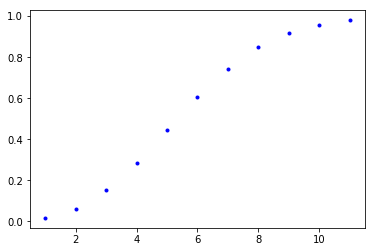

In [ ]:
x = np.arange(stats.poisson.ppf(0.01, 6),stats.poisson.ppf(0.99, 6))
fig, ax = plt.subplots(1, 1)
_ = ax.plot(x, stats.poisson.cdf(x, 6), 'bo', ms=3)

In [ ]:
stats.poisson.cdf(9,6)

0.9160759830051242

In [ ]:
stats.poisson.ppf(0.9, 6)

9.0

Ожидается $\le 9$ поломок

4. Видите ли вы проблемы в моделировании этой ситуации распределением Пуассона?

Проблема в том, что распределние Пуассона должно использоваться, когда мала вероятность события (0.05-0.1) и количество испытаний велико. Таким образом, в нашей задаче, минимальное n должно быть равно 20, при этом у нас всего один станок. Для корректного использования данного распределения необходимо иметь минимум 20 станков.

## Нормальное распределение против Коши

Давайте проведем эксперименты с нормальным распределением. Мы берем n= 1, 10, 100,..., N случайных величин, которые имеют стандартное нормальное распределение. 

Посмотрите, какой результат мы получаем для каждой величины, и посчитайте сумму этих результатов, поделенную на их количество n. 

Сделайте график на котором сумма/количество нанесены против n, для n=1,10,100,1000,5000,10000.

In [ ]:
n = [1, 10, 100, 1000, 5000, 10000]
y = []

for i in n:
    s = 0
    r = stats.norm.rvs(size=i, random_state = 42)
    s = r.sum()/i
    y.append(s)    

In [ ]:
y

[0.4967141530112327,
 0.44806111169875623,
 -0.10384651739409384,
 0.01933205582232549,
 0.005601930087572765,
 -0.0021359833684262055]

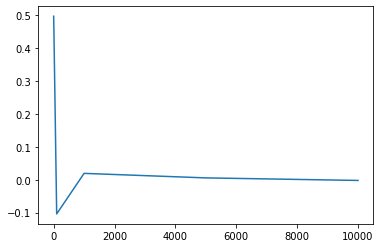

In [ ]:
plt.plot(n,y)

Повторите прошлое задание для распределения Коши. ``scipy.stats.cauchy``

In [ ]:
n = [1, 10, 100, 1000, 5000, 10000]
y = []

for i in n:
    s = 0
    r = stats.cauchy.rvs(size=i, random_state = 42)
    s = r.sum()/i
    y.append(s)   

In [ ]:
y

[-0.4159072178501147,
 0.1367649354633249,
 -0.6674364059676741,
 1.0027740614605345,
 -8.016149519276926,
 -5.056137830889829]

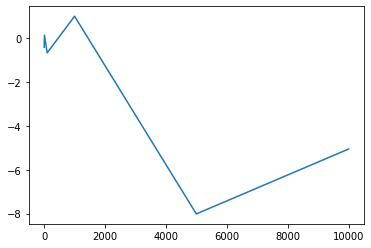

In [ ]:
n = [1, 10, 100, 1000, 5000, 10000]
plt.plot(n,y)

Есть ли между ними разница?

В случае нормального распределения сумма стремится к нулю, в случае распределения Коши такой сходимости нет. Это связано с тем, что распределение Коши не имеет математического ожидания.

## Подготовка к следующему занятию

Давайте снова возьмем n=1,..., N случайных величин, распределенных как равномерное распределение на \[0,1\] ``scipy.stats.uniform``. Визуализируйте это распределение.

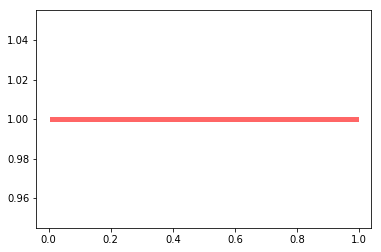

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.uniform.ppf(0.01),
                stats.uniform.ppf(0.99), 100)
_ = ax.plot(x, stats.uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')

Теперь давайте возьмем n= 1, 5, 25, 100 случайных величин. 

Посмотрите, какой резултат мы получим для каждой величины и посчитайте сумму этих резултатов, поделенную на их количество n, получив 4 новых случайных величин. 

После этого повторите это 1000 раз и визуализируйте хистограммы этих 4-х новых случайных величин.

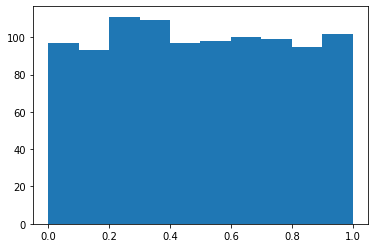

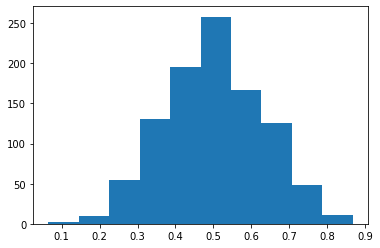

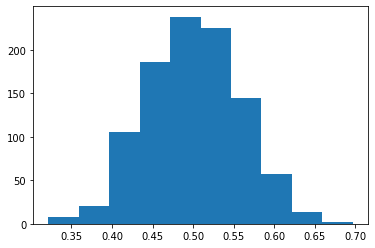

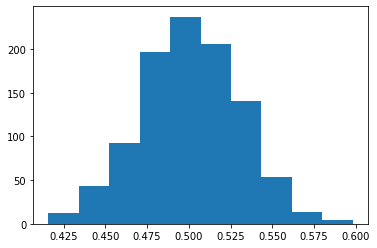

In [ ]:
n = [1, 5, 25, 100]
y = []

for i in n:
    s = []
    sr = 0
    for j in range(1001):
        s.append(np.mean(stats.uniform.rvs(size=i)))   
    y.append(s)
    

for i in y:
    fig, ax = plt.subplots(1, 1)
    plt.hist(i)

Распределение стремится к нормальному